In [1]:
import pandas as pd 
import seaborn as sn
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("creditcard.csv")

print(data.head())
# print(data.tail())

# data.describe()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#checking the fraud and non fraud cases

In [2]:
classes=data["Class"].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [3]:
normal_cases=round((classes[0]/data["Class"].count()*100),2)
normal_cases

99.83

In [4]:
fraud_cases=round((classes[1]/data["Class"].count()*100),2)
fraud_cases

0.17

the data is imbalanced

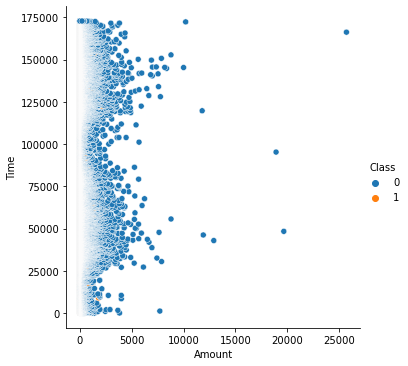

In [5]:
fraud_data=data.loc[data["Class"]==1]
non_fraud_data=data.loc[data["Class"]==0]

# print(fraud_data)
# print(fraud_data.count())
# print(len(fraud_data))
# print(len(non_fraud_data))

a=sn.relplot(x="Amount",y="Time",hue="Class",data=data)
print(a)





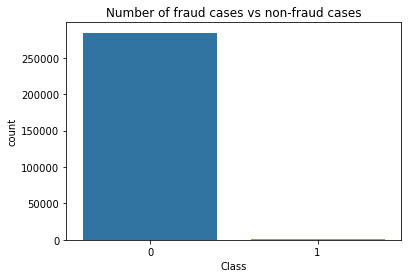

In [6]:
sn.countplot(x='Class', data=data)
plt.title('Number of fraud cases vs non-fraud cases')
plt.show()

In [7]:
# b=sn.catplot(x="Amount",y="Time",hue="Class",data=data)
# print(b)

In [8]:
X=data.iloc[:,:-1]
y=data["Class"]

print(X)
print(y)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.35)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
# predictions = model.predict(X_test)
# print(predictions)



DecisionTreeClassifier()

In [10]:
y_pred = model.predict(X_test)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))
print("ACCURACY")
print(accuracy_score(y_test,y_pred))
print("CLASSIFICATION REPORT")
print(classification_report(y_test,y_pred))

CONFUSION MATRIX
[[99474    40]
 [   44   125]]
ACCURACY
0.9991573287320807
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99514
           1       0.76      0.74      0.75       169

    accuracy                           1.00     99683
   macro avg       0.88      0.87      0.87     99683
weighted avg       1.00      1.00      1.00     99683



In [11]:
# parameter grid 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# grid search model

grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.5min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [12]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.495404,0.059752,0.018105,0.002130,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.946994,0.927066,0.918420,0.930826,0.011965,5
1,2.487432,0.024073,0.018448,0.002362,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.947001,0.927066,0.927654,0.933907,0.009262,3
2,2.584167,0.051417,0.018330,0.002672,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.946976,0.927212,0.946642,0.940277,0.009239,2
3,2.564934,0.041106,0.020334,0.000276,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.946974,0.927212,0.946648,0.940278,0.009240,1
4,4.939836,0.057767,0.019664,0.000774,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.959794,0.918080,0.885634,0.921169,0.030354,8
5,5.162801,0.225557,0.020045,0.000653,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.969023,0.918085,0.894474,0.927194,0.031109,7
6,4.979044,0.198489,0.021287,0.001579,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.947528,0.944887,0.902873,0.931763,0.020457,4
7,4.948527,0.089814,0.018419,0.002069,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.938545,0.944837,0.902894,0.928758,0.018468,6


In [13]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9402778919251694
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


In [14]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [15]:
# PREDICTION ON TRAIN SET!
from sklearn.metrics import f1_score
y_train_pred = dt_imb_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

[[184801      0]
 [     0    323]]
Accuracy:- 0.9990925001620535
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7299035369774919


In [16]:
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184801
           1       0.76      0.70      0.73       323

    accuracy                           1.00    185124
   macro avg       0.88      0.85      0.86    185124
weighted avg       1.00      1.00      1.00    185124



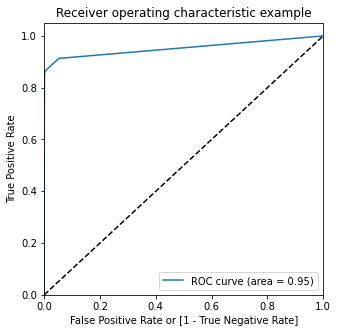

In [17]:
# classification_report
print(classification_report(y_train, y_train_pred))
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)



In [18]:
# PREDICTION ON TEST SET BELOW!
y_test_pred = dt_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[99475    39]
 [   55   114]]


In [19]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990570107239951
Sensitivity:- 0.6745562130177515
Specificity:- 0.9996080953433688
F1-Score:- 0.7299035369774919


In [20]:
# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99514
           1       0.75      0.67      0.71       169

    accuracy                           1.00     99683
   macro avg       0.87      0.84      0.85     99683
weighted avg       1.00      1.00      1.00     99683



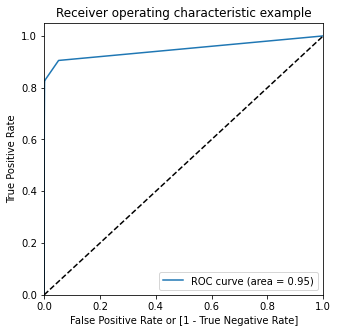

In [21]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# HANDLING THE DATA IMBALANCE IN THE DATASET


As the data is highly imbalanced , we will balance the class distribution using undersampling data approach.

# undersampling

In [22]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [23]:
X=data.iloc[:,:-1]
y=data["Class"]


In [24]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.35)

In [25]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [26]:
# Before sampling class distribution
print('BEFORE SAMPLING CLASS DISTRIBUTION:-',Counter(y_train))
# new class distribution 
print('NEW CLASS DISTRIBUTION:-',Counter(y_train_rus))

BEFORE SAMPLING CLASS DISTRIBUTION:- Counter({0: 184797, 1: 327})
NEW CLASS DISTRIBUTION:- Counter({0: 327, 1: 327})


In [27]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# the grid search model

grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [28]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010392,0.001215,0.005570,0.004321,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.967679,0.958000,0.949752,0.958477,0.007327,4
1,0.008424,0.000602,0.000000,0.000000,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.971215,0.958674,0.950257,0.960048,0.008611,2
2,0.004913,0.003519,0.000000,0.000000,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.957537,0.946595,0.940704,0.948279,0.006975,6
3,0.001317,0.001862,0.002021,0.002858,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.957537,0.946595,0.940704,0.948279,0.006975,6
4,0.008457,0.000658,0.000000,0.000000,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.970078,0.953413,0.955896,0.959796,0.007341,3
5,0.005325,0.003765,0.002675,0.003782,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.968058,0.960609,0.953203,0.960623,0.006065,1
6,0.002660,0.003762,0.000000,0.000000,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.959641,0.946595,0.940704,0.948980,0.007913,5
7,0.000000,0.000000,0.005321,0.003763,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.957537,0.946595,0.940704,0.948279,0.006975,6


In [29]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9606234043150129
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [30]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_rus_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [31]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [32]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[327   0]
 [115 212]]


In [33]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))
print(classification_report(y_train_rus, y_train_pred))




Accuracy:- 0.8241590214067278
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       327
           1       1.00      0.65      0.79       327

    accuracy                           0.82       654
   macro avg       0.87      0.82      0.82       654
weighted avg       0.87      0.82      0.82       654



In [34]:
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [35]:
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9681330602549355

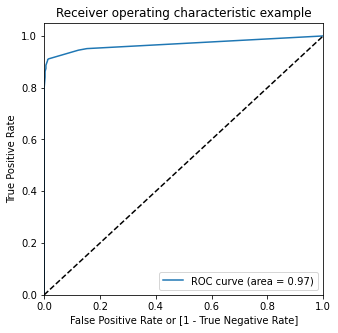

In [36]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [37]:
# PREDICTION ON TEST SET BELOW!
y_test_pred = dt_bal_rus_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[99499    19]
 [   61   104]]


In [38]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))



Accuracy:- 0.999197455935315
Sensitivity:- 0.6303030303030303
Specificity:- 0.9998090797644648


In [39]:
# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99518
           1       0.85      0.63      0.72       165

    accuracy                           1.00     99683
   macro avg       0.92      0.82      0.86     99683
weighted avg       1.00      1.00      1.00     99683



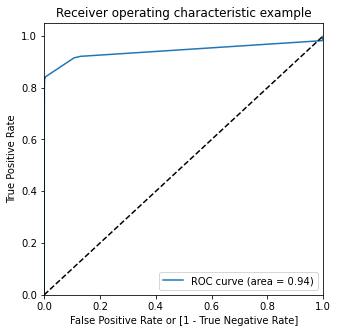

In [40]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)